# Developing regression tests 02

Comparing output of old (2014, `src/cmm_error_map/mpl_2014`) matplotlib code with new code.

Specifically looking at the tests from 
`test_mpl_regression.test_XYX_regression`

with the sign corrections applied in `test_mpl_regression.sign_corrections` and the max values from `pmax` te following tests fail
- `mmt XZ-Ryz`
- `mmt XZ-Rzz`
- `mmt YZ-Ryz`
- `mmt YZ-Rzz`

plot these old/new to see what's happening.

In [82]:
import numpy as np

import cmm_error_map.config.config as cf
import cmm_error_map.data_cmpts as dc
import cmm_error_map.mpl_2014.design_matrix_linear as design_old

In [83]:
from cmm_error_map.mpl_2014.ballplate_plots import single_grid_plot

In [84]:
abs_tol = 1e-6

sign_corrections = {
    "Txx": 1,
    "Txy": -1,
    "Txz": -1,
    "Tyx": -1,
    "Tyy": 1,
    "Tyz": -1,
    "Tzx": -1,
    "Tzy": -1,
    "Tzz": 1,
    "Rxx": -1,
    "Rxy": -1,
    "Rxz": -1,
    "Ryx": -1,
    "Ryy": -1,
    "Ryz": 1,
    "Rzx": -1,
    "Rzy": -1,
    "Rzz": 1,
    "Wxy": -1,
    "Wxz": -1,
    "Wyz": -1,
}
ballspacing = 133.0
x0, y0, z0 = 250.0, 50.0, 50.0

In [85]:
def test_XYZ_regression(model_params, mmt):
    """
    regression test a set of model parameters with the given mmt against the old matplotlib code,
    the old code only calculates for a koba 620 plate on a PMM866.
    """
    # new code
    cmm = dc.pmm_866
    mmt.recalculate(model_params, cmm.cmm_model)

    # matplotlib code
    signed_mp = {
        key: sign_corrections[key] * value for key, value in model_params.items()
    }
    params = list(signed_mp.values())
    xt, yt, zt = mmt.probe.length
    dxy, eXYZ, XYZp, XM, plate_nom = design_old.modelled_mmts_XYZ(
        mmt.transform_mat, xt, yt, zt, params, verbose=True
    )
    # testing
    # np.testing.assert_allclose(XM[:-1, :], mmt.cmm_nominal, atol=abs_tol)
    # np.testing.assert_allclose(eXYZ[:-1, :], mmt.cmm_dev, atol=abs_tol)
    # np.testing.assert_allclose(plate_nom, mmt.mmt_nominal[:-1, :], atol=abs_tol)
    # np.testing.assert_allclose(dxy.T, mmt.mmt_dev[:-1, :], atol=abs_tol)
    return mmt, dxy

In [86]:
def make_mmts():
    """
    return a dict of dc.Measurement
    one for each CMM plane XY, XZ, YZ
    """
    ballspacing = 133.0
    x0, y0, z0 = 250.0, 50.0, 50.0
    # XY plane
    x0xy, y0xy, z0xy = x0, y0, z0
    transform_mat_xy = np.array(
        [
            [1.0, 0.0, 0.0, x0xy],
            [0.0, 1.0, 0.0, y0xy],
            [0.0, 0.0, 1.0, z0xy],
            [0.0, 0.0, 0.0, 1.0],
        ]
    )

    xt, yt, zt = 0.0, 0.0, -243.4852
    prb_xy = dc.Probe(title="P0", name="p0", length=np.array([xt, yt, zt]))
    mmt_xy = dc.Measurement(
        title="Plate XY",
        name="mmt_00",
        artefact=cf.artefact_models["KOBA 0620"],
        transform_mat=transform_mat_xy,
        probe=prb_xy,
        cmm_nominal=None,
        cmm_dev=None,
        mmt_nominal=None,
        mmt_dev=None,
    )
    # XZ plane
    x0xz, y0xz, z0xz = x0, y0 + 2.0 * ballspacing, z0
    transform_mat_xz = np.array(
        [
            [1.0, 0.0, 0.0, x0xz],
            [0.0, 0.0, 1.0, y0xz],
            [0.0, 1.0, 0.0, z0xz],
            [0.0, 0.0, 0.0, 1.0],
        ]
    )

    xt_xz, yt_xz, zt_xz = 0.0, 130.0, -243.4852
    prb_xz = dc.Probe(title="P0", name="p0", length=np.array([xt_xz, yt_xz, zt_xz]))
    mmt_xz = dc.Measurement(
        title="Plate XZ",
        name="mmt_01",
        artefact=cf.artefact_models["KOBA 0620"],
        transform_mat=transform_mat_xz,
        probe=prb_xz,
        cmm_nominal=None,
        cmm_dev=None,
        mmt_nominal=None,
        mmt_dev=None,
    )
    # YZ plane
    x0yz, y0yz, z0yz = x0 + 2.0 * ballspacing, y0, z0
    transform_mat_yz = np.array(
        [
            [0.0, 0.0, 1.0, x0yz],
            [1.0, 0.0, 0.0, y0yz],
            [0.0, 1.0, 0.0, z0yz],
            [0.0, 0.0, 0.0, 1.0],
        ]
    )
    xt_yz, yt_yz, zt_yz = 130.0, 0.0, -243.4852
    prb_yz = dc.Probe(title="P0", name="p0", length=np.array([xt_yz, yt_yz, zt_yz]))
    mmt_yz = dc.Measurement(
        title="Plate YZ",
        name="mmt_02",
        artefact=cf.artefact_models["KOBA 0620"],
        transform_mat=transform_mat_yz,
        probe=prb_yz,
        cmm_nominal=None,
        cmm_dev=None,
        mmt_nominal=None,
        mmt_dev=None,
    )

    mmts = {"mmt XY": mmt_xy, "mmt XZ": mmt_xz, "mmt YZ": mmt_yz}
    return mmts


mmt_tests = make_mmts()


In [87]:
model = dc.model_parameters_dict.copy()
model["Rzz"] = 5e-8

In [88]:
mmt, dxy = test_XYZ_regression(model, mmt_tests["mmt YZ"])

In [89]:
mmt.mmt_dev[:-1, -1].T

array([0.003458, 0.      ])

In [90]:
dxy[-1, :]

array([-0.003458,  0.      ])

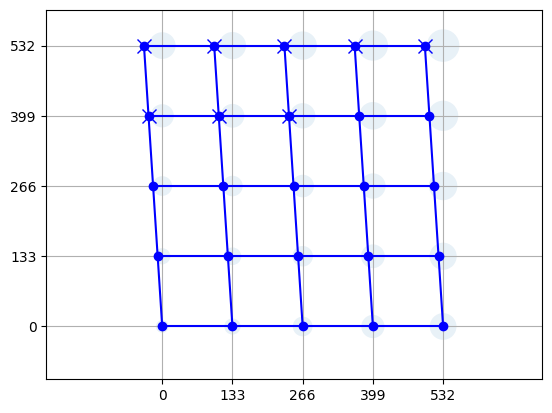

In [91]:
single_grid_plot(dxy, 10000);

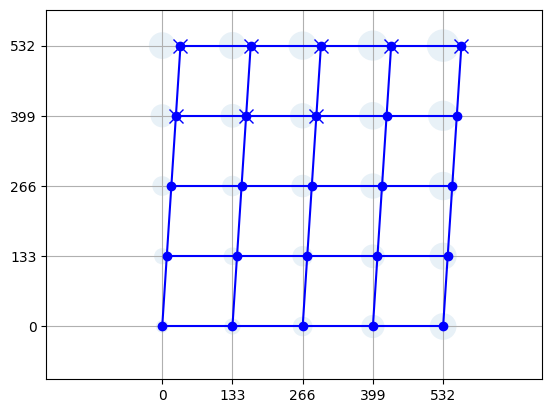

In [92]:
single_grid_plot(mmt.mmt_dev[:-1, :].T, 10000);

In [93]:
mmt.transform_mat

array([[  0.,   0.,   1., 516.],
       [  1.,   0.,   0.,  50.],
       [  0.,   1.,   0.,  50.],
       [  0.,   0.,   0.,   1.]])

In [94]:
# read in a dump from main app of Rzz=5e-8, for config in `/home/elfnor/Desktop/PMM866_3axis_plates.pkl`
import pickle

In [ ]:
filename = "/home/elfnor/gits/ls_cmm_error_map/notebooks/mmts.pkl"
with open(filename, "rb") as fp:
    dump_mmts = pickle.load(fp)

for key, mmt in dump_mmts.items():
    print(key)
    print(mmt.title, mmt.name)

mmt_control_grp0
Plate XY mmt_control_grp0
mmt_control_grp1
Plate XZ mmt_control_grp1
mmt_control_grp2
Plate YZ mmt_control_grp2


In [116]:
for mmt in mmt_tests.values():
    mmt.recalculate(model, dc.pmm_866.cmm_model)

In [117]:
dump_mmts["mmt_control_grp2"].artefact

ArtefactType(title='KOBA 0620', nballs=[5, 5], ball_spacing=133.0)

In [118]:
mmt_tests["mmt YZ"].artefact

ArtefactType(title='KOBA 0620', nballs=[5, 5], ball_spacing=133.0)

In [119]:
dump_mmts["mmt_control_grp2"].transform_mat

array([[ 2.22044605e-16, -2.22044605e-16,  1.00000000e+00,
         5.16000000e+02],
       [ 1.00000000e+00,  0.00000000e+00, -2.22044605e-16,
         5.00000000e+01],
       [ 0.00000000e+00,  1.00000000e+00,  2.22044605e-16,
         5.00000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [120]:
mmt_tests["mmt YZ"].transform_mat

array([[  0.,   0.,   1., 516.],
       [  1.,   0.,   0.,  50.],
       [  0.,   1.,   0.,  50.],
       [  0.,   0.,   0.,   1.]])

In [121]:
np.testing.assert_allclose(
    dump_mmts["mmt_control_grp2"].transform_mat,
    mmt_tests["mmt YZ"].transform_mat,
    atol=1e-9,
)

In [122]:
dump_mmts["mmt_control_grp2"].probe, mmt_tests["mmt YZ"].probe

(Probe(title='Probe YZ', name='prb_control_grp2', length=array([ 130.    ,    0.    , -243.4852])),
 Probe(title='P0', name='p0', length=array([ 130.    ,    0.    , -243.4852])))